In [3]:
import os
import tarfile
import tempfile
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

In [4]:
# temp_dir = tempfile.mkdtemp()

# with tarfile.open('../ip102_v1.1.tar', "r") as tar:
#     tar.extractall(path=temp_dir)

C:\Users\moah\AppData\Local\Temp\ipykernel_13340\3713999749.py:4: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=temp_dir)


In [5]:
def load_split_file(file_path):
    with open(file_path,'r') as f:
        lines= f.readlines()
    samples = []
    for line in lines:
        path, label= line.strip().split()
        samples.append((path, int(label)))
    return samples


In [15]:
dataset_root = os.path.join(temp_dir, "ip102_v1.1")
train_txt = os.path.join(dataset_root, "train.txt")
val_txt = os.path.join(dataset_root, "val.txt")
test_txt = os.path.join(dataset_root, "test.txt")
images_root=os.path.join(dataset_root, "images")

train_data = load_split_file(train_txt)
test_data = load_split_file(test_txt)
val_data = load_split_file(val_txt)

In [18]:
class CustomImageDataset(Dataset):
    def __init__(self,data_list,root_dir,transform=None):
        self.data_list = data_list
        self.root_dir = root_dir    
        self.transform = transform

    def __len__(self):
        return len(self.data_list)
    
    def __getitem__(self, idx):
        path, label = self.data_list[idx]
        image_path= os.path.join(self.root_dir,path)
        image= Image.open(image_path)

        if self.transform:
            image = self.transform(image)

        return image, label

In [19]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

train_dataset = CustomImageDataset(train_data, images_root, transform=transform)
val_dataset = CustomImageDataset(val_data, images_root, transform=transform)
test_dataset = CustomImageDataset(test_data, images_root, transform=transform)

In [20]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

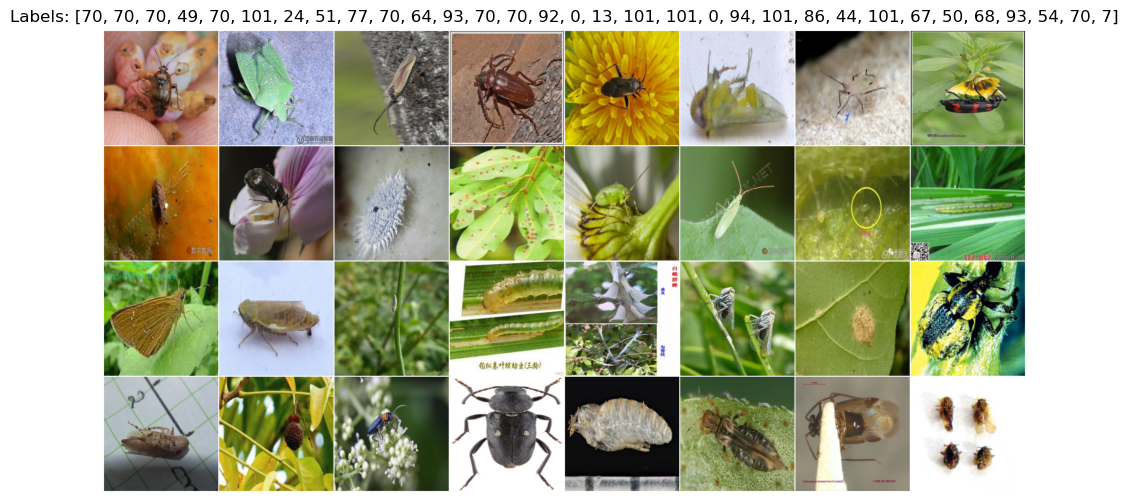

In [21]:
import matplotlib.pyplot as plt
import torchvision

# Get one batch from the loader
images, labels = next(iter(train_loader))

# Make a grid of images
grid = torchvision.utils.make_grid(images, nrow=8, normalize=True, pad_value=1)

# Convert to numpy for plotting
npimg = grid.permute(1, 2, 0).numpy()

# Plot the grid
plt.figure(figsize=(12, 6))
plt.imshow(npimg)
plt.title(f"Labels: {labels.tolist()}")
plt.axis("off")
plt.show()
